In [1]:
# Machine Learning Library
import pandas as pd
import numpy as np
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [7]:
# Deep Learning Library
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [8]:
train_data = pd.read_csv("train.txt", header = None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

In [9]:
train_data['length'] = [len(x) for x in train_data['Comment']]

In [10]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [11]:
train_data.shape

(16000, 3)

In [12]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [13]:
train_data.duplicated().sum()

1

In [11]:
# EDA

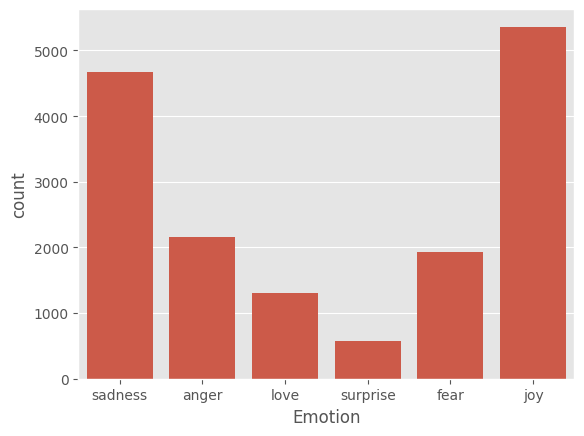

In [14]:
sns.countplot(x=train_data['Emotion'])
plt.show()

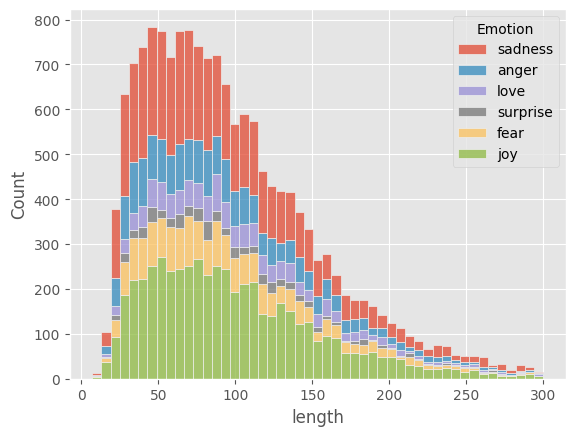

In [15]:
df2 = train_data.copy()
df2['length'] = [len(x) for x in train_data['Comment']]
length_value = df2['length'].values
sns.histplot(data=df2, x='length',hue='Emotion',multiple = 'stack')
plt.show()

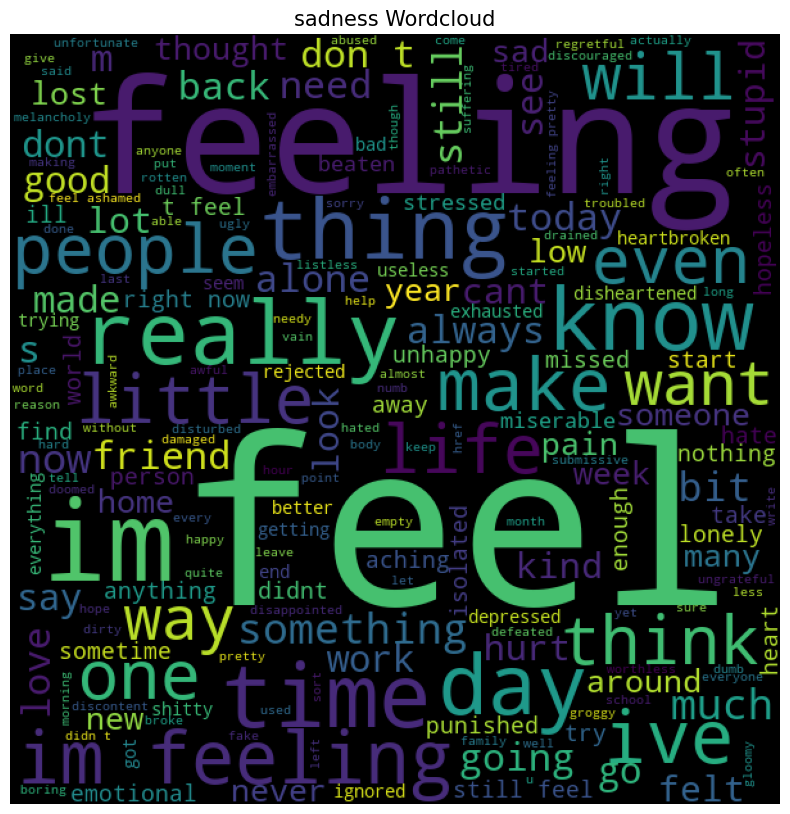

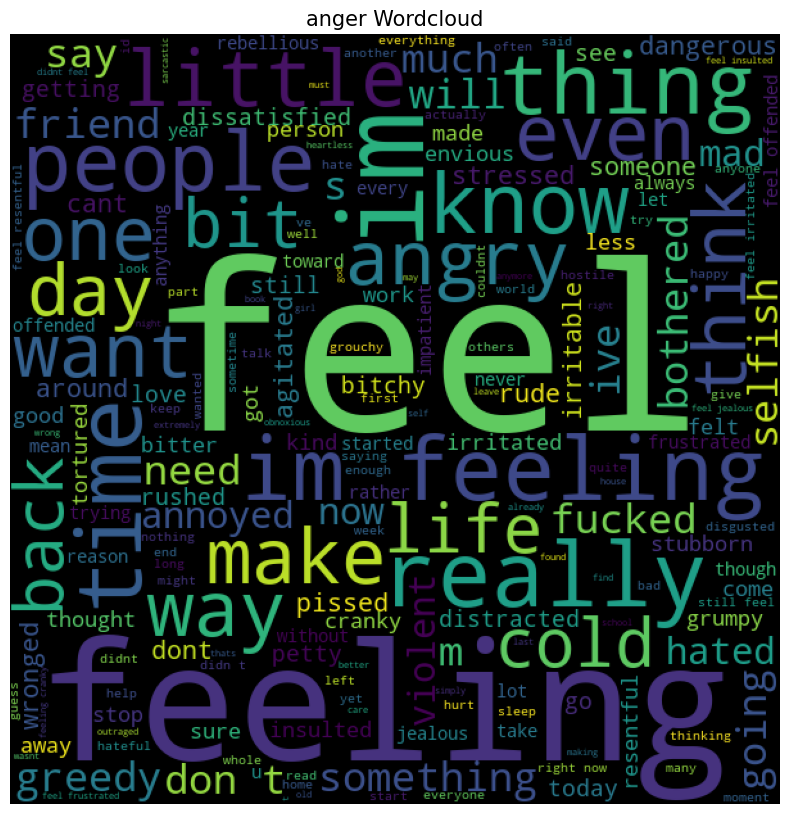

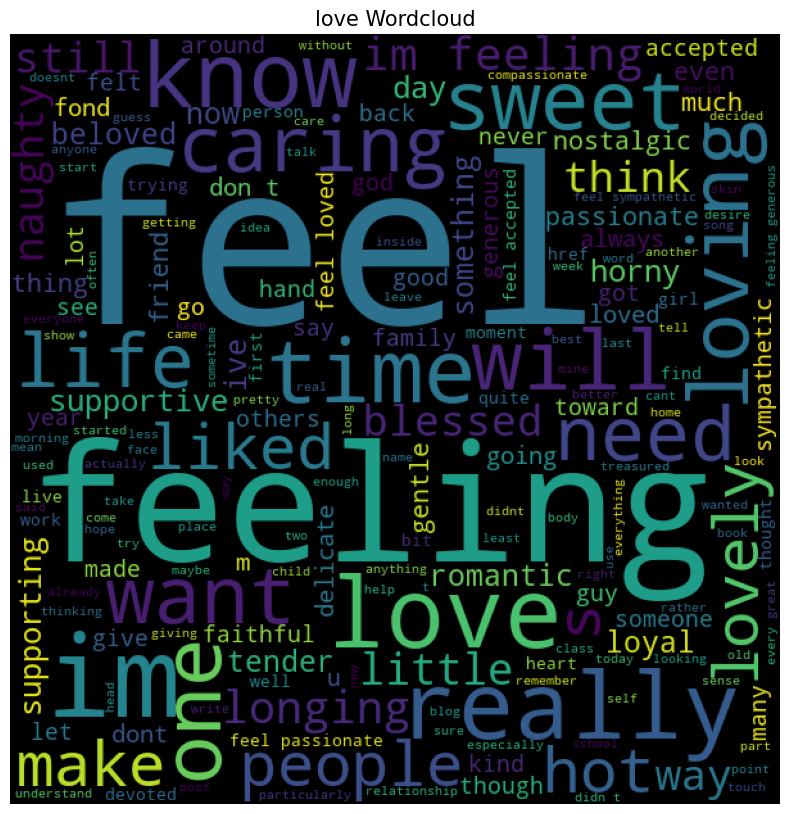

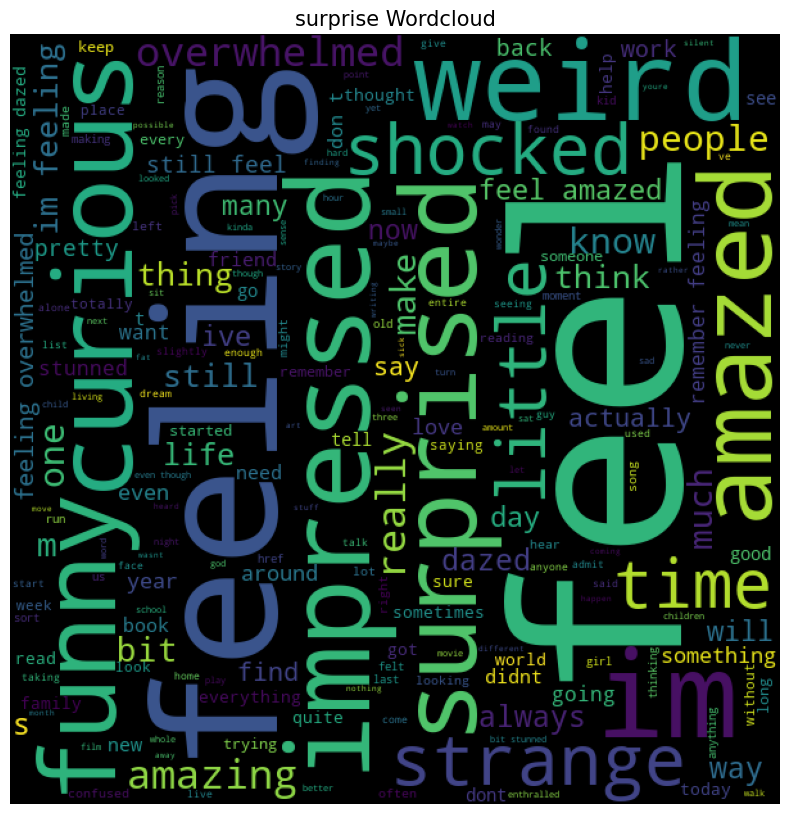

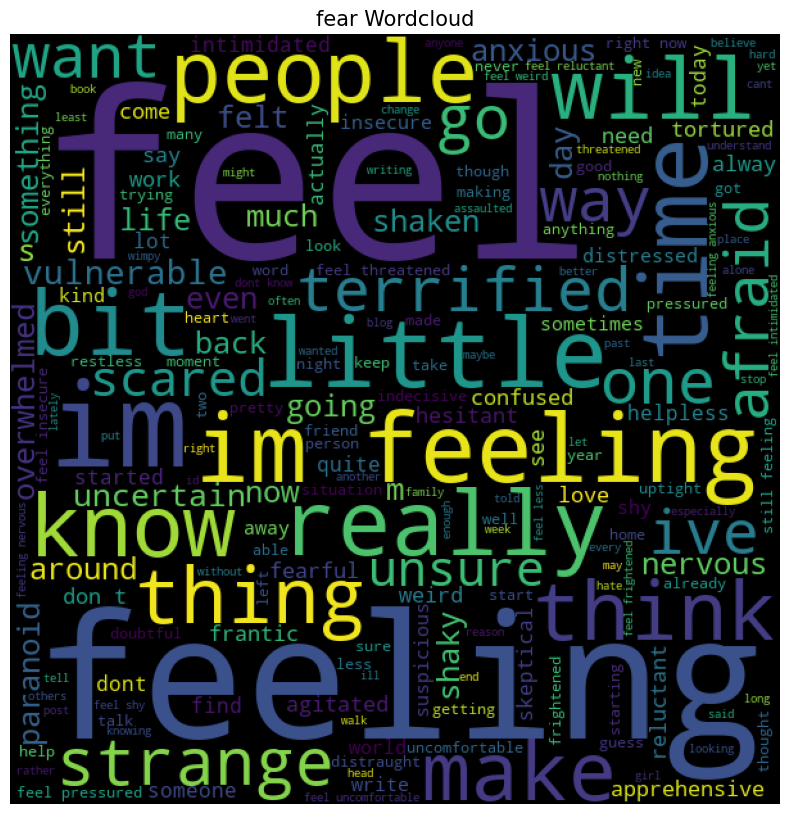

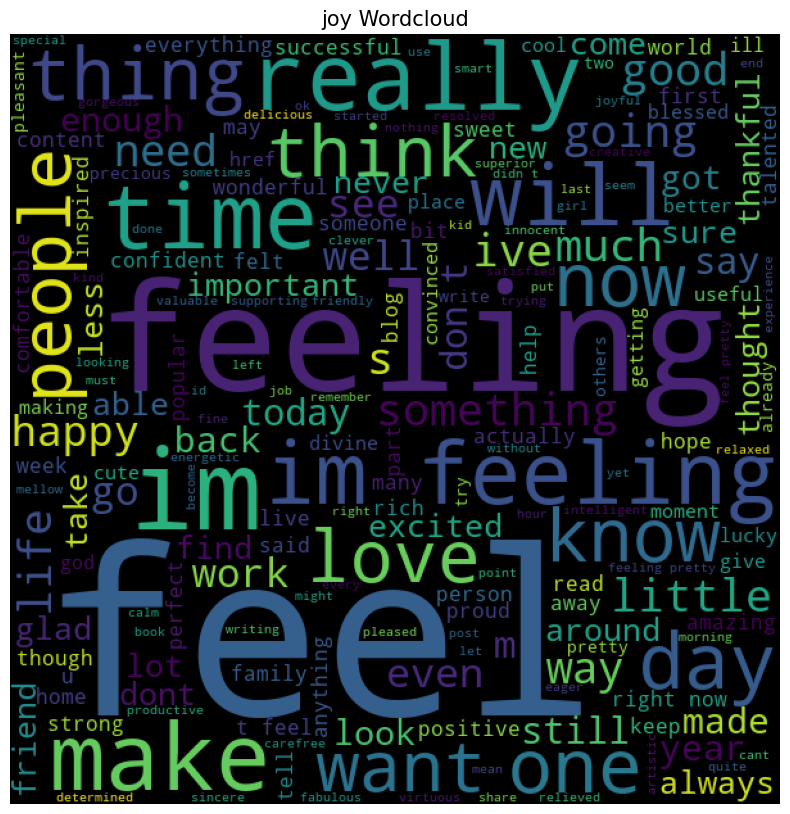

In [16]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10,10))
    plt.title(df + ' Wordcloud', size = 15)
    plt.imshow(wordcloud)
    plt.axis("off")
emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join( train_data.loc[train_data['Emotion'] == emotion,'Comment'])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

In [19]:
# Data preprocessing

In [17]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [18]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
df = train_data.copy()

In [21]:
df.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [22]:
from tqdm import tqdm
tqdm.pandas()
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_data(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['cleaned_comment']  = df['Comment'].progress_apply(clean_data)
# df['cleaned_comment']  = df['Comment'].apply(clean_data) 

[nltk_data] Downloading package stopwords to C:\Users\Arunava
[nltk_data]     Chakraborty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 16000/16000 [00:03<00:00, 5121.60it/s]


In [23]:
df.head()

,Comment,Emotion,length,cleaned_comment
0,i didnt feel humiliated,4,23,didnt feel humili
1,i can go from feeling so hopeless to so damned...,4,108,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,20,feel grouchi


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['Emotion'], test_size = 0.2, random_state=42)

In [25]:
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [26]:
X_train_tfidf

<12800x9257 sparse matrix of type '<class 'numpy.float64'>'
	with 115139 stored elements in Compressed Sparse Row format>

In [32]:
X_train_tfidf.shape

(12800, 9257)

In [27]:
classifier={
    'MultinomialNB':MultinomialNB(),
    'LogisticRegression':LogisticRegression(),
    # 'Random Forest':RandomForestClassifier(),
    # 'Support Vector Machine': SVC(),
}

for name,clf in classifier.items():
    print(f"\n============{name}============")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"======={accuracy_tfidf}============")
    print("Classification Report")
    print(classification_report(y_test, y_pred_tfidf))
    


============MultinomialNB============
=======0.655============
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


============LogisticRegression============
=======0.829375============
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
      

In [28]:
# Homework-> Random Forest
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

In [29]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])
    
    predicted_label = lg.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorizer))
    
    return predicted_emotion, label

In [38]:
predict_emotion("i am hopeless")

('sadness', 4)

In [39]:
import pickle
pickle.dump(lg, open("logistic_regression.pkl","wb"))
pickle.dump(lb, open("label_encoder.pkl","wb"))
pickle.dump(tfidfvectorizer, open("tfidfvectorizer.pkl","wb"))

In [ ]:
# APPLYING DEEP LEARNING USING LSTM(LONG SHORT TERM MEMORY)

In [42]:
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ",text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding="pre")
    return pad

In [43]:
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])

In [ ]:
# input_dim=11000: This specifies the size of the vocabulary. In this case, it means that the model will expect input tokens to be represented by integers in the range from 0 to 10,999, which corresponds to a vocabulary size of 11,000 unique words or tokens.

# output_dim=150: This defines the dimensionality of the output space for each word or token. Here, each word in the vocabulary will be represented as a dense vector of size 150. This means that the embedding layer will transform the input integer (representing a word) into a 150-dimensional vector.

# input_length=300: This specifies the length of the input sequences. The model expects each input sequence to be of length 300, which means that the embedding layer will process sequences of 300 tokens (words) at a time. If the input sequences are shorter than 300 tokens, they will be padded; if longer, they will be truncated.

In [48]:
model = Sequential()
model.add(Embedding(input_dim = 11000, output_dim = 150, input_length = 300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs = 10, batch_size = 10, verbose = 1, callbacks=[callback])

Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 254s 157ms/step - accuracy: 0.4522 - loss: 1.3745
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 216s 135ms/step - accuracy: 0.8997 - loss: 0.3006
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 906s 566ms/step - accuracy: 0.9288 - loss: 0.1942
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 215s 134ms/step - accuracy: 0.9456 - loss: 0.1433
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 197s 123ms/step - accuracy: 0.9627 - loss: 0.1046
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 168s 105ms/step - accuracy: 0.9690 - loss: 0.0870
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 164s 103ms/step - accuracy: 0.9734 - loss: 0.0726
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 160s 100ms/step - accuracy: 0.9798 - loss: 0.0549
Epoch 9/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 155s 97ms/step - accuracy: 0.9800 - loss: 0.0521
Epoch 10/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 159s 99ms/step - accuracy: 0.9828 - loss: 0.0472


In [49]:
# Discord
# Machine Learning

In [49]:
model.save("model.h5")

In [54]:
from keras.models import load_model
model01 = load_model("model.h5")

In [52]:
def predictive_system_dl(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ",sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding="pre")
    return pad

In [59]:
sentence = predictive_system_dl("you are bad boy")
result = lb.inverse_transform(np.argmax(model.predict(sentence), axis = 1))[0]
prob = np.max(model01.predict(sentence))
print(f"{result} with probability of {prob}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
anger with probability of 0.9992308616638184


In [57]:
with open("lb1.pkl","wb") as f:
    pickle.dump(lb,f)
vocab_info = {"vocab_size": 11000, "max_len":300}
with open("vocab_info.pkl","wb") as f:
    pickle.dump(vocab_info, f)